In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv('E:/INTERN/Datasets/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<AxesSubplot:>

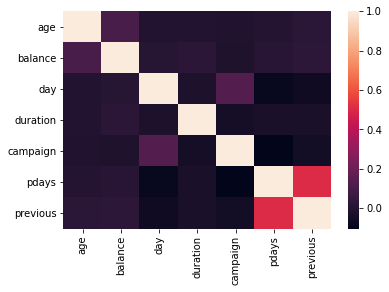

In [3]:
sns.heatmap(data.corr())

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["default"]=le.fit_transform(data["default"])
data["housing"]=le.fit_transform(data["housing"])
data["loan"]=le.fit_transform(data["loan"])
data["poutcome"]=le.fit_transform(data["poutcome"])
data["job"]=le.fit_transform(data["job"])
data["marital"]=le.fit_transform(data["marital"])

In [36]:
#train test spit
from sklearn.model_selection import train_test_split
x=data.iloc[:,[0,1,2,4,5,7,6,11,15]]
y=data.iloc[:,16]

In [37]:
x

,age,job,marital,default,balance,loan,housing,duration,poutcome
0,59,0,1,0,2343,0,1,1042,3
1,56,0,1,0,45,0,0,1467,3
2,41,9,1,0,1270,0,1,1389,3
3,55,7,1,0,2476,0,1,579,3
4,54,0,1,0,184,0,0,673,3
...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,0,1,257,3
11158,39,7,1,0,733,0,0,83,3
11159,32,9,2,0,29,0,0,156,3
11160,43,9,1,0,0,1,0,9,0


In [38]:
y

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
#Perform AdaBoost
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [41]:
print(results)

[0.80306905 0.79411765 0.78772379 0.80409731 0.78233035 0.7759283
 0.83098592 0.80153649 0.79641485 0.79513444]


In [42]:
print(results.mean())

0.7971338142783696


In [43]:
model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=30, random_state=7)

In [44]:
ada_pred  =  model.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
ada_cm = confusion_matrix(y_test, ada_pred)
ada_ac = accuracy_score(y_test,ada_pred)

In [46]:
ada_cm

array([[1486,  306],
       [ 326, 1231]], dtype=int64)

In [47]:
ada_ac

0.8112869513287548